# Testing linear or nonlinear dendritic integration in ICx


This notebook produces results discussed in section
**Testing nonlinear subthreshold frequency integration in ICx**
and produces figures 3 and 8.

The notebook also produces plots for all neurons that were not included in the paper.



## Set up

Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import plotly.graph_objects as go
from scipy.signal import find_peaks
import scipy.io as sio
from scipy.stats import f
sns.set_style("white")

Give the location of the data files for the tone and tone-combination ITD curves.

In [2]:
filelist = ["https://www.dropbox.com/s/h6b9xm2j4owwj9f/AddStack405_03_00index135.mat?dl=0",
            "https://www.dropbox.com/s/w5xql6ticz1bzi8/AddStack405_04_00index135.mat?dl=0",
            "https://www.dropbox.com/s/un12q36btbtqkpn/AddStack680_02_03index125.mat?dl=0",
            "https://www.dropbox.com/s/7994etpjtx4v6t5/AddStack680_02_04index134.mat?dl=0",
            "https://www.dropbox.com/s/8pxndzoeluupv0i/AddStack631_04index1245.mat?dl=0",
            "https://www.dropbox.com/s/7jl7t1qezsxu7d8/AddStack632_03index123.mat?dl=0",
            "https://www.dropbox.com/s/2lizasw2wvpo2nm/AddStack629_02index123.mat?dl=0",
            "https://www.dropbox.com/s/48nv6yuz1u77www/AddStack629_07index1245.mat?dl=0",
            "https://www.dropbox.com/s/x7yc1zx801hqqw0/AddStack642_07index123.mat?dl=0",
            "https://www.dropbox.com/s/5h6igkejfk9ndnw/AddStack639_01index123.mat?dl=0",
            "https://www.dropbox.com/s/modpsn8j1ljz10x/AddStack663_05_03index248.mat?dl=0",
            "https://www.dropbox.com/s/ogf2d12bqp06bre/AddStack665_03_03index245.mat?dl=0",
            "https://www.dropbox.com/s/0eop2bckhwik5ur/AddStack667_02_03index248.mat?dl=0",
            "https://www.dropbox.com/s/l1j5jjbmz3fx6es/AddStack624_07index123.mat?dl=0",
            "https://www.dropbox.com/s/eee7zxzn117rw8y/AddStack640_01index1234.mat?dl=0",
            "https://www.dropbox.com/s/69m3mq64a8rr051/AddStack640_02index1235.mat?dl=0",
            "https://www.dropbox.com/s/462zvrif2wqcykv/AddStack640_04index123.mat?dl=0",
            "https://www.dropbox.com/s/e0jcqzzu4stmvjh/AddStack645_03index1234.mat?dl=0",
            "https://www.dropbox.com/s/flh38k03bobv0jz/AddStack628_05index1234.mat?dl=0"]

Give the names of the loaded files

In [3]:
filenames = ["AddStack405_03_00index135.mat?dl=0",
            "AddStack405_04_00index135.mat?dl=0",
            "AddStack680_02_03index125.mat?dl=0",
            "AddStack680_02_04index134.mat?dl=0",
            "AddStack631_04index1245.mat?dl=0",
            "AddStack632_03index123.mat?dl=0",
            "AddStack629_02index123.mat?dl=0",
            "AddStack629_07index1245.mat?dl=0",
            "AddStack642_07index123.mat?dl=0",
            "AddStack639_01index123.mat?dl=0",
            "AddStack663_05_03index248.mat?dl=0",
            "AddStack665_03_03index245.mat?dl=0",
            "AddStack667_02_03index248.mat?dl=0",
            "AddStack624_07index123.mat?dl=0",
            "AddStack640_01index1234.mat?dl=0",
            "AddStack640_02index1235.mat?dl=0",
            "AddStack640_04index123.mat?dl=0",
            "AddStack645_03index1234.mat?dl=0",
            "AddStack628_05index1234.mat?dl=0"]

**Functions to fit**

We fit three different curves: a line, a quadratic, and a sigmoid to the data

In [4]:
def linear(x, a, b):
    return a*x + b

In [5]:
def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

In [6]:
def sigmoid(x, a, b, c, d, e):
    return a/(1 + np.exp(-b*(x - c))) + d + e*x 

## Fit all population data


In [7]:
#Load all add-stack data
!wget https://www.dropbox.com/s/irsqhc1owy9af0w/ICx_Add_Stack_Data.mat?dl=0

#Filename
filename = 'ICx_Add_Stack_Data.mat?dl=0'

#The data are .mat files. Use scipy to load a file:
mat = sio.loadmat(filename, squeeze_me=True)
 
#First select the add and stack data:
Add = mat['ICx_Add_Shift']
Stack = mat['ICx_Stack']

#Get directory information
#dir_name = mat['dirnames']
#Filename = mat['ICx_Filename']

#Number of neurons
N = np.size(Add)

#Number of models (linear, quadratic, sigmoid)
M = 3 

--2021-09-15 16:34:39--  https://www.dropbox.com/s/irsqhc1owy9af0w/ICx_Add_Stack_Data.mat?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/irsqhc1owy9af0w/ICx_Add_Stack_Data.mat [following]
--2021-09-15 16:34:39--  https://www.dropbox.com/s/raw/irsqhc1owy9af0w/ICx_Add_Stack_Data.mat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc87878d6a4c939814b7ba421d3b.dl.dropboxusercontent.com/cd/0/inline/BWPOZ11P7Gc6ayhYPc9Wz_vqZsMEuWA1DjZWqQEy4HI5wcOYVqTfJCpEii172xf9E3KOAQDmlVH4lH3fEd4krwcDraLadDNxp0vvOOvDUqR8v8tK9Z89KgAwJx3v8or8N1Pr4xClGGmnwtF1JMuOkkZa/file# [following]
--2021-09-15 16:34:39--  https://uc87878d6a4c939814b7ba421d3b.dl.dropboxusercontent.com/cd/0/inline/BWPOZ11P7Gc6ayhYPc9Wz_vqZsMEuWA1DjZWqQEy4HI5wcOYVqTfJCp

In [8]:
#Initialize
adj_r2 = np.zeros((N,M))  #Adjusted R^2

coef_lin = np.zeros((N,2)) #Coefficients for fitted curves
coef_quad = np.zeros((N,3))
coef_sig = np.zeros((N,5))


#Loop over neurons
for i in np.arange(N):
    
    #Get data for this neuron
    y_add = Add[i]
    y_stack = Stack[i]

    ## Fit models
    
    #Fit linear
    popt_L, _ = curve_fit(linear, y_add, y_stack)
    coef_lin[i,:] = popt_L
    
    #Fit quadratic
    popt_Q, _ = curve_fit(quadratic, y_add, y_stack)
    coef_quad[i,:] = popt_Q
    
    #Fit sigmoid
    p_min = [0, -1, np.min(y_add)-5, np.min(y_stack)-20, 0]
    p_max = [(np.max(y_stack)-np.min(y_stack))*1.25, 18, np.max(y_add)+5, np.max(y_stack)+20, 1]
    
      #Do multiple initializations of model parameters
    n_reps = 5
    r2 = np.zeros(n_reps)
    coef = np.zeros((n_reps,5))
    x = np.linspace(np.min(y_add),np.max(y_add),100)
    for k in np.arange(n_reps-1):

        p_init = [np.max(y_stack)-np.min(y_stack)+np.random.uniform(-.5,.5), 0.0+np.random.uniform(-.01,.01), np.median(y_add)+np.random.uniform(-3,3), np.median(y_stack)+np.random.uniform(-3,3), .2+np.random.uniform(-0.05,0.05)]    
        popt_S, _ = curve_fit(sigmoid, y_add, y_stack, p0 = p_init, bounds = (p_min, p_max))

        S_pred = sigmoid(y_add, *popt_S)
        S_p = sigmoid(x, *popt_S)
        r2[k] = r2_score(y_stack, S_pred) 
        coef[k,:] = popt_S
    
    p_init = [np.max(y_stack)-np.min(y_stack), 0.0, np.median(y_add), np.median(y_stack), .2]
    
    popt_S, _ = curve_fit(sigmoid, y_add, y_stack, p0 = p_init, bounds = (p_min, p_max))

    S_pred = sigmoid(y_add, *popt_S)
    S_p = sigmoid(x, *popt_S)
    r2[n_reps-1] = r2_score(y_stack, S_pred) 
    coef[n_reps-1,:] = popt_S
    
      #Get coefficients of best sigmoid model
    coef_sig[i,:] = coef[np.argmax(r2),:]
    
    ## Get adjusted R^2 for each fit

    #Number of data points
    n = np.size(y_add)
    
    #Linear adjusted R^2
    k_L = 1 #Number of parameters other than the constant
    L_pred = linear(y_add, *popt_L)
    #L_p = linear(x, *popt_L)
    r2_L = r2_score(y_stack, L_pred) 
    adj_r2_L = 1 - (1 - r2_L)*(n - 1)/(n - k_L - 1)

    #Quadratic adjusted R^2
    k_Q = 2 #Number of parameters other than the constant
    Q_pred = quadratic(y_add, *popt_Q)
    #Q_p = quadratic(x, *popt_Q)
    r2_Q = r2_score(y_stack, Q_pred) 
    adj_r2_Q = 1 - (1 - r2_Q)*(n - 1)/(n - k_Q - 1)

    #Sigmoid adjusted R^2
    k_S = 4 #Number of parameters other than the constant
    S_pred = sigmoid(y_add, *coef_sig[i,:])
    #S_p = sigmoid(x, *popt_S)
    r2_S = r2_score(y_stack, S_pred) 
    adj_r2_S = 1 - (1 - r2_S)*(n - 1)/(n - k_S - 1)

    #Collect values for the 3 models
    adj_r2[i,:] = [adj_r2_L, adj_r2_Q, adj_r2_S]
    

## Assess fit using LOOCV

In [9]:
#Initialize
LOOCV_mse = np.zeros((N,M))
LOOCV_sd = np.zeros((N,M))

for i in np.arange(N): 
    
    #Get data for this neuron
    X = Add[i]
    y = Stack[i]
       
    #Number of data points for this neuron    
    n = np.size(y)
    
    #MSE values for each test data point
    mse = np.zeros((n,M))
    
    for k in np.arange(n):   
        
        #Get data for this neuron with k^th point removed
        y_add = np.delete(X,k)
        y_stack = np.delete(y,k)

        #k^th point is the test point     
        x_test = X[k]
        y_test = y[k]

        #Fit linear
        popt_L, _ = curve_fit(linear, y_add, y_stack)

        #Fit quadratic
        popt_Q, _ = curve_fit(quadratic, y_add, y_stack)
  
        #Fit sigmoid
        p_min = [0, -1, np.min(y_add)-5, np.min(y_stack)-20, 0]
        p_max = [(np.max(y_stack)-np.min(y_stack))*1.25, 18, np.max(y_add)+5, np.max(y_stack)+20, 1]
    
        #Do multiple initializations of model parameters
        n_reps = 5
        r2 = np.zeros(n_reps)
        coef = np.zeros((n_reps,5))
        #x = np.linspace(np.min(y_add),np.max(y_add),100)
        for j in np.arange(n_reps-1):

            p_init = [np.max(y_stack)-np.min(y_stack)+np.random.uniform(-.5,.5), 0.0+np.random.uniform(-.01,.01), np.median(y_add)+np.random.uniform(-3,3), np.median(y_stack)+np.random.uniform(-3,3), .2+np.random.uniform(-0.05,0.05)]    
            popt_S, _ = curve_fit(sigmoid, y_add, y_stack, p0 = p_init, bounds = (p_min, p_max), maxfev=10000)

            S_pred = sigmoid(y_add, *popt_S)
            #S_p = sigmoid(x, *popt_S)
            r2[j] = r2_score(y_stack, S_pred) 
            coef[j,:] = popt_S

        p_init = [np.max(y_stack)-np.min(y_stack), 0.0, np.median(y_add), np.median(y_stack), .2]

        popt_S, _ = curve_fit(sigmoid, y_add, y_stack, p0 = p_init, bounds = (p_min, p_max), maxfev=10000)

        S_pred = sigmoid(y_add, *popt_S)
        #S_p = sigmoid(x, *popt_S)
        r2[n_reps-1] = r2_score(y_stack, S_pred) 
        coef[n_reps-1,:] = popt_S

          #Get coefficients of best sigmoid model
        coef_sig[i,:] = coef[np.argmax(r2),:]

        #Linear
        L_pred = linear(x_test, *popt_L)
        mse[k,0] = (y_test - L_pred)**2

        #Quadratic
        Q_pred = quadratic(x_test, *popt_Q)
        mse[k,1] = (y_test - Q_pred)**2

        #Sigmoid
        S_pred = sigmoid(x_test, *coef_sig[i,:])  
        mse[k,2] = (y_test - S_pred)**2
        

    LOOCV_mse[i,:] = np.mean(mse,axis = 0)
    
    LOOCV_sd[i,:] = np.std(mse,axis = 0,ddof = 1)     

## Analyze fit accuracy

### Find linear neurons

In [10]:
#Where is adjusted r^2 largest for linear? 

ind_lin = np.where((adj_r2[:,0] > adj_r2[:,1]) & (adj_r2[:,0] > adj_r2[:,2]))

n_lin_r2 = np.size(ind_lin)

print(n_lin_r2,ind_lin)

6 (array([ 0,  1,  8, 13, 14, 15]),)


In [11]:
#Where is adjusted LOOCV MSE smallest for linear? 

ind_lin_cv = np.where((LOOCV_mse[:,0] < LOOCV_mse[:,1]) & (LOOCV_mse[:,0] < LOOCV_mse[:,2]))

n_lin_cv = np.size(ind_lin_cv)

print(n_lin_cv,ind_lin_cv)

6 (array([ 0,  1,  8, 13, 14, 15]),)


### Find quadratic fits

In [12]:
#Where is adjusted r^2 largest for quadratic?

ind_quad = np.where((adj_r2[:,1] > adj_r2[:,0]) & (adj_r2[:,1] > adj_r2[:,2]))

n_quad_r2 = np.size(ind_quad)

print(n_quad_r2,ind_quad)

3 (array([ 2, 10, 18]),)


In [13]:
#Where is adjusted LOOCV MSE smallest for quadratic? 

ind_quad_cv = np.where((LOOCV_mse[:,1] < LOOCV_mse[:,0]) & (LOOCV_mse[:,1] < LOOCV_mse[:,2]))

n_quad_cv = np.size(ind_quad_cv)

print(n_quad_cv,ind_quad_cv)

8 (array([ 2,  6,  7,  9, 10, 11, 17, 18]),)


### Find sigmoidal fits

In [14]:
#Where is adjusted r^2 largest for sigmoid?

ind_sig = np.where((adj_r2[:,2] > adj_r2[:,0]) & (adj_r2[:,2] > adj_r2[:,1]))

n_sig_r2 = np.size(ind_sig)

print(n_sig_r2,ind_sig)

11 (array([ 3,  4,  5,  6,  7,  9, 11, 12, 16, 17, 19]),)


In [15]:
#Where is adjusted LOOCV MSE smallest for quadratic? 

ind_sig_cv = np.where((LOOCV_mse[:,2] < LOOCV_mse[:,0]) & (LOOCV_mse[:,2] < LOOCV_mse[:,1]))

n_sig_cv = np.size(ind_sig_cv)

print(n_sig_cv,ind_sig_cv)

6 (array([ 3,  4,  5, 12, 16, 19]),)


## Figure 3

--2021-09-15 16:36:32--  https://www.dropbox.com/s/69m3mq64a8rr051/AddStack640_02index1235.mat?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/69m3mq64a8rr051/AddStack640_02index1235.mat [following]
--2021-09-15 16:36:32--  https://www.dropbox.com/s/raw/69m3mq64a8rr051/AddStack640_02index1235.mat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7148fd1456de06a8b398020614.dl.dropboxusercontent.com/cd/0/inline/BWNUohnR0gfVfWQrPQoP0lXICXZD54sj0V9ikFGbTA5qS3-lE0zDJnOecfpZDf0BGGLWxmSboSqwRSeAV-8MXNSjecdP877pST7VO6ndlWnir1WLI9gRrTSLmRMfqJPaFer7Oq7rgV-tACl3vnodT3nL/file# [following]
--2021-09-15 16:36:32--  https://uc7148fd1456de06a8b398020614.dl.dropboxusercontent.com/cd/0/inline/BWNUohnR0gfVfWQrPQoP0lXICXZD54sj0V9ikFGb

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



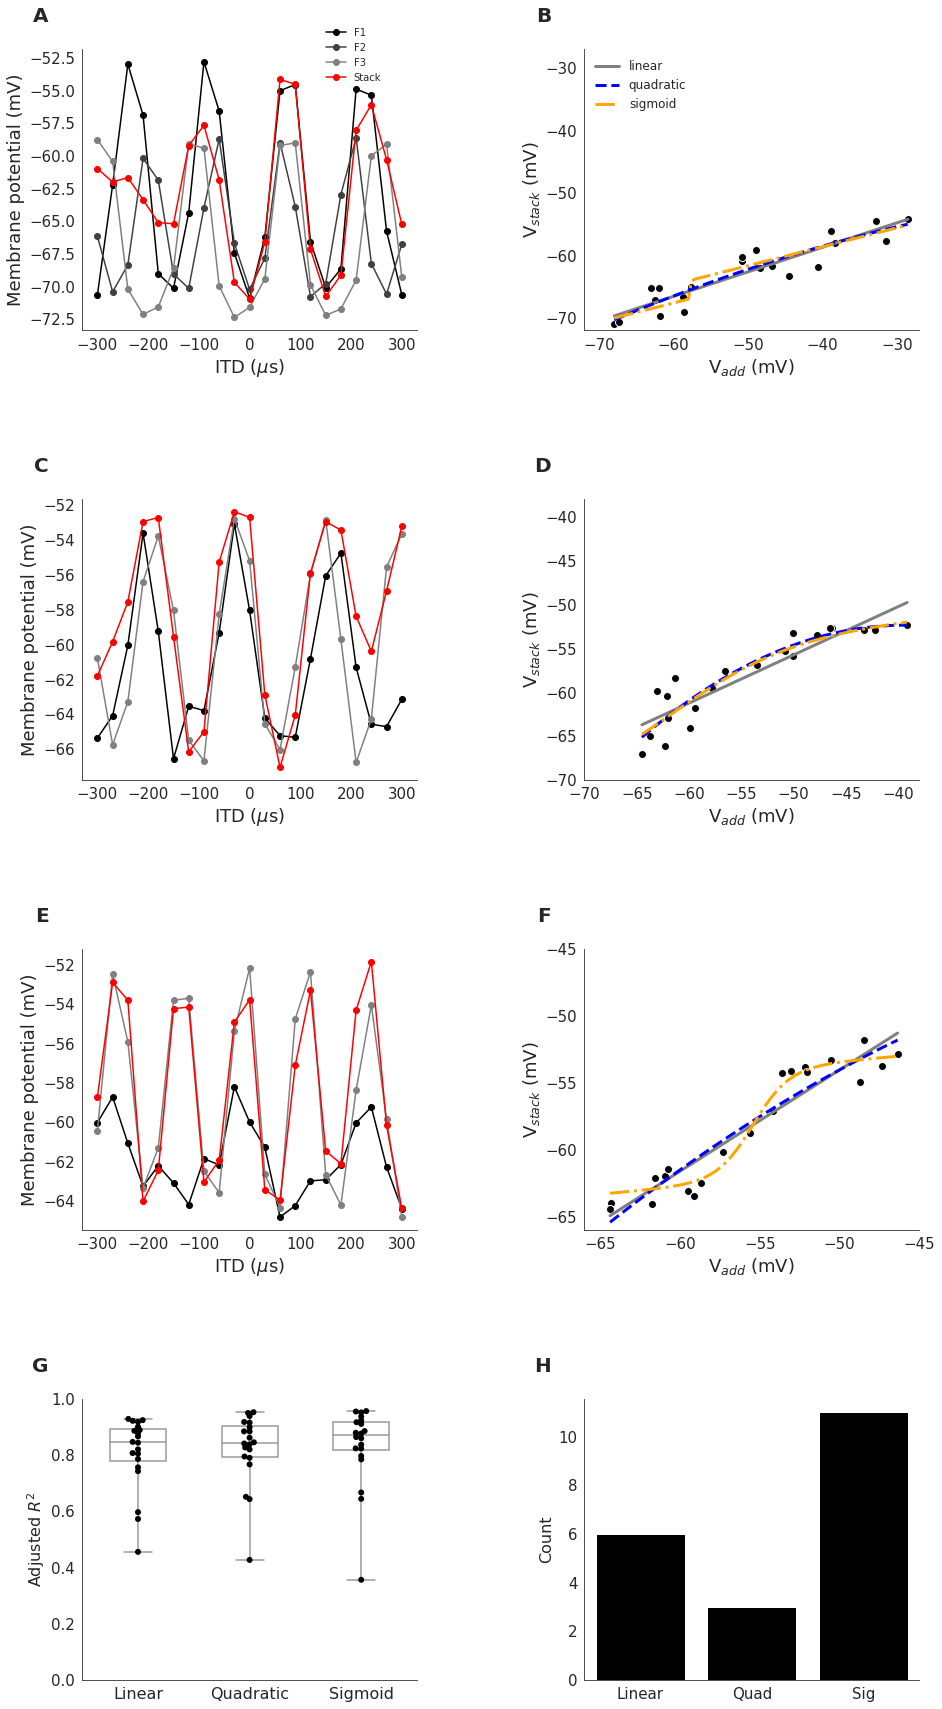

In [16]:
#Plot examples

index = [15, 2, 3]
n = np.size(index)


plt.figure(figsize = (15,30))

labels = ('A', 'B', 'C', 'D', 'E', 'F','G','H')

for k in np.arange(n):

    i = index[k]
    
    #Get data for this neuron
    y_add = Add[i]
    y_stack = Stack[i]
    
    x = np.linspace(np.min(y_add),np.max(y_add),100)

    ax = plt.subplot(4,2,2*k+2)
    
    ax.text(-0.1, 1.15, labels[2*k+1], transform=ax.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
    
    #Predictions
    L_p = linear(x, *coef_lin[i,:])
    Q_p = quadratic(x, *coef_quad[i,:])
    S_p = sigmoid(x, *coef_sig[i,:])

    plt.plot(y_add,y_stack,'ko',mec = 'w',mew = 1,ms = 8)
    plt.plot(x, L_p,'gray',label='linear',lw=3) #Plots a smooth curve
    plt.plot(x, Q_p,'b--',label='quadratic',lw=3) #Plots a smooth curve
    plt.plot(x, S_p,'-.',color = 'orange',label='sigmoid',lw=3) #Plots a smooth curve
    
    
    r_min = np.floor(np.min([np.min(y_add), np.min(y_stack)])) - 1
    r_max = np.ceil(np.max([np.max(y_add), np.max(y_stack)])) + 1
    
    plt.xlim(r_min, r_max)
    plt.ylim(r_min, r_max)
    
    plt.xlabel('V$_{add}$ (mV)',fontsize=18)
    plt.ylabel('V$_{stack}$ (mV)',fontsize=18)
    
    if k == 0:
        plt.xticks(np.arange(-70,-20,step = 10),fontsize = 15)
        plt.yticks(np.arange(-70,-20,step = 10),fontsize = 15)
    elif k == 1:
        plt.xticks(np.arange(-70,-35,step = 5),fontsize = 15)
        plt.yticks(np.arange(-70,-35,step = 5),fontsize = 15)
    else:
        plt.xticks(np.arange(-65,-40,step = 5),fontsize = 15)
        plt.yticks(np.arange(-65,-40,step = 5),fontsize = 15)
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if k == 0:
        plt.legend(fontsize = 12, loc = 'upper left', frameon = False)
        
        
        
    #Plot ITD curves    
    !wget {filelist[i]}

    #The data are .mat files. Use scipy to load a file:
    mat = sio.loadmat(filenames[i], squeeze_me=True)
    
    x = mat['x_m']
    y = mat['y_m']
    
    
    ax = plt.subplot(4,2,2*k+1)
    
    ax.text(-0.1, 1.15, labels[2*k], transform=ax.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')

    
    if k == 0:
        for j in np.arange(np.size(x)):
            if j == 0:
                plt.plot(x[j],y[j],'ko-',label = 'F1')
            elif j == 1: 
                plt.plot(x[j],y[j],'o-',color = '0.25',label = 'F2')
            elif j == 2: 
                plt.plot(x[j],y[j],'o-',color = '0.5',label = 'F3')
            #elif j == 3: 
                #plt.plot(x[j],y[j],'o-',color = 'orange',label = 'F4')
                #plt.plot(x[j],y[j],'o-',color = '0.75',label = 'F4')
            elif j == 4:
                plt.plot(x[j],y[j],'ro-',label = 'Stack')  
    
    else:
        for j in np.arange(np.size(x)):
            if j == 0:
                plt.plot(x[j],y[j],'ko-',label = 'F1')
            elif j == 1: 
                plt.plot(x[j],y[j],'o-',color = 'gray',label = 'F2')
            else:
                plt.plot(x[j],y[j],'ro-',label = 'Stack')  
    
    
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel('ITD ($\mu$s)',fontsize=18)
    plt.ylabel('Membrane potential (mV)',fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if k == 0:
        #plt.ylim(-83, -53)
        #plt.legend(fontsize = 12,loc = 'upper left')
        ax.legend(bbox_to_anchor=(.7, .85), frameon = False)
    
#R^2
ax = plt.subplot(4,2,7)
#ax.text(-0.1, 1.2, labels[6], transform=ax.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax.text(-0.1, 1.15, labels[6], transform=ax.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')

sns.boxplot(data = adj_r2,color = 'w',whis=np.inf,width = 0.5)
sns.swarmplot(data = adj_r2,color = 'k',size = 6,alpha = 1)
plt.xticks([0, 1, 2], ['Linear', 'Quadratic', 'Sigmoid'],fontsize = 16)
plt.yticks(fontsize = 15)
plt.ylabel('Adjusted $R^2$',fontsize = 16)
plt.ylim(0,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
 
    
    
  
#Type counts        
ax = plt.subplot(4,2,8)    

ax.text(-0.1, 1.15, labels[7], transform=ax.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
  
 
nl = np.size(ind_lin)
nq = np.size(ind_quad)
nsig = np.size(ind_sig)

counts = [nl, nq, nsig]
models = ['Linear', 'Quad', 'Sig']  
    
ax = sns.barplot(models, counts, color = 'k')

plt.tick_params(labelsize = 15)
plt.ylabel('Count', fontsize = 16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
    
    
    
plt.subplots_adjust(wspace = 0.5, hspace = 0.6)


#from google.colab import files

#plt.savefig('Gorman_Figure3.tiff',dpi = 400)
#files.download("Figure3.png") 

plt.show() 

## Figure 8

--2021-09-15 16:36:38--  https://www.dropbox.com/s/69m3mq64a8rr051/AddStack640_02index1235.mat?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/69m3mq64a8rr051/AddStack640_02index1235.mat [following]
--2021-09-15 16:36:38--  https://www.dropbox.com/s/raw/69m3mq64a8rr051/AddStack640_02index1235.mat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc99d767ce98e1151b2bad3012b9.dl.dropboxusercontent.com/cd/0/inline/BWNMexrGpAUCNhjOg9if5iRlcwrsgiy6JPRbvjTD3PKPeyVBOTj_kp7eIXkVObFRa1-UzxgOSSqyd5RxA9f0vu7DkMhmB2iXa7syLY0N3g335BbvzvaTwYl5eZRTkDJ4lP6C1nAVqN7LfEI9BcFxM6cj/file# [following]
--2021-09-15 16:36:38--  https://uc99d767ce98e1151b2bad3012b9.dl.dropboxusercontent.com/cd/0/inline/BWNMexrGpAUCNhjOg9if5iRlcwrsgiy6JPRbvjTD

<Figure size 360x504 with 0 Axes>

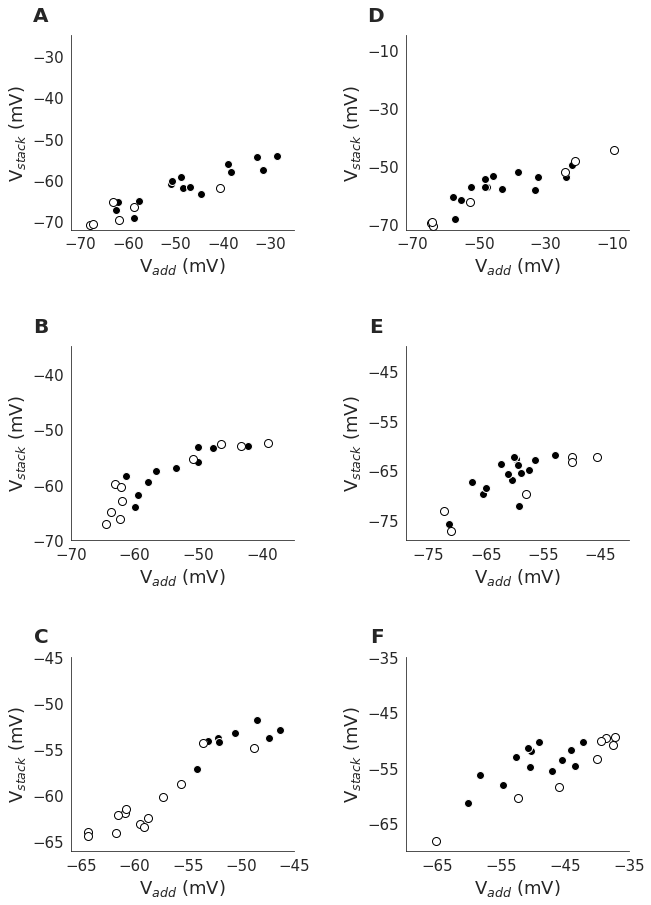

In [17]:

index = [15, 4, 2, 6, 3, 16]
n = np.size(index)

th = 3

plt.figure(figsize = (5,7))
plt.figure(figsize = (10,15))

labels = ('A','D','B','E','C','F')
 
for k in np.arange(n):

    i = index[k]
    

    !wget {filelist[i]}

    #The data are .mat files. Use scipy to load a file:
    mat = sio.loadmat(filenames[i], squeeze_me=True)

    #x = mat['x_m']
    y = mat['y_m']
    
    y_add = Add[i]
    y_stack = Stack[i]

    y1 = y[0]
    y2 = y[1]

    ax = plt.subplot(3,2,k + 1)
    plt.plot(y_add,y_stack,'ko',mec = 'w',mew = 1,ms = 8)
    plt.plot(y_add[np.abs(y1 - y2) < th],y_stack[np.abs(y1 - y2) < th],'wo',mec = 'k',mew = 1,ms = 8)
    #plt.plot(y_add[np.abs(y1 - y2) < th],y_stack[np.abs(y1 - y2) < th],'ro',mec = 'w',mew = 1,ms = 8)

    ax.text(-0.1, 1.15, labels[k], transform=ax.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
    

    r_min = np.floor(np.min([np.min(y_add), np.min(y_stack)])) - 1
    r_max = np.ceil(np.max([np.max(y_add), np.max(y_stack)])) + 1
    r_max = np.ceil(r_max/5)*5
    
    plt.xlim(r_min, r_max)
    plt.ylim(r_min, r_max)
    
    plt.xlabel('V$_{add}$ (mV)',fontsize=18)
    plt.ylabel('V$_{stack}$ (mV)',fontsize=18)
    

    if k == 0:
        plt.xticks(np.arange(-70,-20,step = 10),fontsize = 15)
        plt.yticks(np.arange(-70,-20,step = 10),fontsize = 15)
    elif k == 1:
        plt.xticks(np.arange(-70,10,step = 20),fontsize = 15)
        plt.yticks(np.arange(-70,10,step = 20),fontsize = 15)    
    elif k == 2:
        plt.xticks(np.arange(-70,-35,step = 10),fontsize = 15)
        plt.yticks(np.arange(-70,-35,step = 10),fontsize = 15)
    elif k == 3:
        plt.xticks(np.arange(-75,-35,step = 10),fontsize = 15)
        plt.yticks(np.arange(-75,-35,step = 10),fontsize = 15)
    elif k == 4:
        plt.xticks(np.arange(-65,-40,step = 5),fontsize = 15)
        plt.yticks(np.arange(-65,-40,step = 5),fontsize = 15)
    elif k == 5:
        plt.xticks(np.arange(-65,-25,step = 10),fontsize = 15)
        plt.yticks(np.arange(-65,-25,step = 10),fontsize = 15)    
    
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    
    
plt.subplots_adjust(wspace = 0.5, hspace = 0.6)


#from google.colab import files

plt.savefig('Gorman_Figure8.tiff',dpi = 400)
#files.download("Figure8.png") 


 
plt.show()